In [39]:
#необходимые модули
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt

In [2]:
#читаю данные
data = pd.read_csv("glass.data", header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#разбиваю на тест и трайн
X, y = data.values[:, :-1], data.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [4]:
# обучение модели k ближайших соседей
model_nbrs = KNeighborsClassifier(n_neighbors=3)
model_nbrs.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
# оценка качества модели: accuracy - доля правильных ответов
y_pred = model_nbrs.predict(X_test)

print ("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.6744186046511628


In [6]:
# обучение модели решающего дерева
model_tree = DecisionTreeClassifier(max_depth=7, random_state=17)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [7]:
# оценка качества
y_pred = model_tree.predict(X_test)

print ("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.7209302325581395


In [8]:
# нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model_nbrs = KNeighborsClassifier(n_neighbors=3)
model_nbrs.fit(X_train_scaled, y_train)

y_pred = model_nbrs.predict(X_test_scaled)

print ("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.813953488372093


In [10]:
model_tree = DecisionTreeClassifier(max_depth=7, random_state=17)
model_tree.fit(X_train_scaled, y_train)

y_pred = model_tree.predict(X_test_scaled)
print ("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.7209302325581395


In [54]:
def evaluate (X_train, y_train, X_test, y_test, N, model, scaler):
    train_acc = []
    test_acc = []
    for i in range(10):
        ids = np.random.choice(range(0, 9), N, replace=False)
        X_train_scaled = scaler.fit_transform(X_train[:, ids])
        X_test_scaled = scaler.transform(X_test[:, ids])
        model_nbrs = KNeighborsClassifier(n_neighbors=3)
        model_nbrs.fit(X_train_scaled, y_train)
        y_pred_train = model_nbrs.predict(X_train_scaled)
        y_pred = model_nbrs.predict(X_test_scaled)
        train_acc.append(accuracy_score(y_train, y_pred_train))
        test_acc.append(accuracy_score(y_test, y_pred))
    
    print ("train accuracy:", np.mean(train_acc))
    print ("test accuracy:", np.mean(test_acc))  
    return np.mean(train_acc), np.mean(test_acc), np.std(train_acc), np.std(test_acc)

In [57]:
scaler = StandardScaler()
model_nbrs = KNeighborsClassifier(n_neighbors=3)
train_scores=[]
test_scores=[]
train_stds=[]
test_stds=[]
for i in range(1, 10):
    train_acc,test_acc, train_std, test_std = evaluate(X_train, y_train, X_test, y_test, i,model_nbrs, scaler)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    train_stds.append(train_std)
    test_stds.append(test_std)

train accuracy: 0.5730994152046784
test accuracy: 0.4046511627906977
train accuracy: 0.6736842105263158
test accuracy: 0.48604651162790696
train accuracy: 0.764327485380117
test accuracy: 0.6465116279069768
train accuracy: 0.8011695906432749
test accuracy: 0.7209302325581396
train accuracy: 0.7842105263157895
test accuracy: 0.7023255813953488
train accuracy: 0.8005847953216374
test accuracy: 0.7511627906976743
train accuracy: 0.8175438596491228
test accuracy: 0.7511627906976743
train accuracy: 0.8035087719298245
test accuracy: 0.7883720930232558
train accuracy: 0.8245614035087719
test accuracy: 0.813953488372093


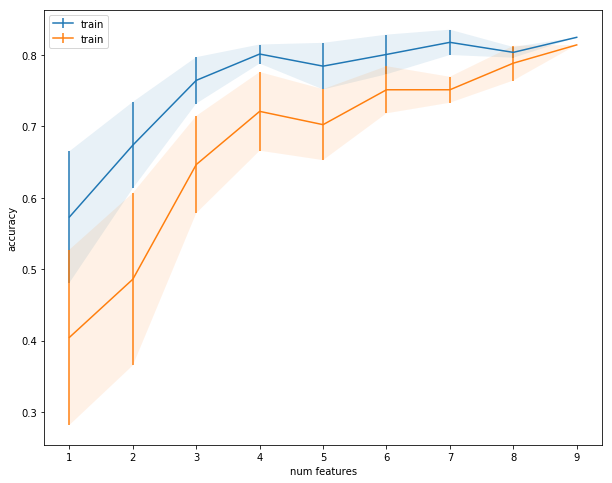

In [61]:
plt.figure(figsize=(10,8))
plt.errorbar(range(1, 10), np.array(train_scores), yerr=np.array(train_stds), label='train')
plt.fill_between(range(1, 10),
                 np.array(train_scores) + np.array(train_stds), 
                 np.array(train_scores) - np.array(train_stds),
                 alpha=0.1)
plt.errorbar(range(1, 10), np.array(test_scores), yerr=np.array(test_stds), label='train')
plt.fill_between(range(1, 10),
                 np.array(test_scores) + np.array(test_stds), 
                 np.array(test_scores) - np.array(test_stds),
                 alpha=0.1)
plt.xlabel('num features')
plt.ylabel('accuracy')
plt.legend()
plt.show()